### About Project:
Developing classical models for predicting restaurant revenue
### About Data:
After taking a look at the data, there are 137 samples in the training set and 100,000 samples in the test set. This is very intriguing since the distribution of data is usually the other way around. The goal here would be to model revenue based on 137 samples in the training set and see how well the model performs on the 100,000 samples in the test set. The data fields for each sample consist of the restaurant ID which is unique for each restaurant in the sample, the opening date of the restaurant, the city, city group, restaurant type, several non-arbitrary P-variables, and revenue which is the target variable. Using a complex model for this small training dataset with noise will cause the model to overfit to the dataset. To prevent that from happening, regularization techniques for linear regression will definitely need to be used.


## Preprocessing the Data

#### 1.Importing the requred

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

#### 2.Importing the table

In [6]:
df=pd.read_csv("train.csv")
final_test_data=pd.read_csv("test.csv")
print(df.head())
print("-----------------------------------------------------------------------------------------------")
print("Columns names")
print(df.columns)

   Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  3.0    0    0    0    0    0    0    0    0  6923131.0  
2  3.0    0    0    0    0    0    0    0    0  2055379.0  
3  7.5   25   12   10    6   18   12   12    6  2675511.0  
4  3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 43 columns]
-----------------------------------------------------------------------------------------------
Columns names
Index(['Id', 'Open Date', 'City', 'Cit

#### 3.Describing data

In [7]:
print("Data Description")
print(df.describe())
print("-----------------------------------------------------------------------------------------------")
print("Number of rows and columns")
print(df.shape)
print("-----------------------------------------------------------------------------------------------")
print("data information")
print(df.info())
print("-----------------------------------------------------------------------------------------------")

Data Description
               Id          P1          P2          P3          P4          P5  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean    68.000000    4.014599    4.408759    4.317518    4.372263    2.007299   
std     39.692569    2.910391    1.514900    1.032337    1.016462    1.209620   
min      0.000000    1.000000    1.000000    0.000000    3.000000    1.000000   
25%     34.000000    2.000000    4.000000    4.000000    4.000000    1.000000   
50%     68.000000    3.000000    5.000000    4.000000    4.000000    2.000000   
75%    102.000000    4.000000    5.000000    5.000000    5.000000    2.000000   
max    136.000000   12.000000    7.500000    7.500000    7.500000    8.000000   

               P6          P7          P8          P9  ...         P29  \
count  137.000000  137.000000  137.000000  137.000000  ...  137.000000   
mean     3.357664    5.423358    5.153285    5.445255  ...    3.135036   
std      2.134235    2.296809  

In [8]:
print("Data percentaile")
print(df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
print("------------ -----------------------------------------------------------------------------------")
print("Checking for null")
print(df.isnull().sum())
#after varyfing the data we found that there is no missing of data
print("there is no null or missing data in the selected sourse")

Data percentaile
               Id          P1          P2          P3          P4          P5  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean    68.000000    4.014599    4.408759    4.317518    4.372263    2.007299   
std     39.692569    2.910391    1.514900    1.032337    1.016462    1.209620   
min      0.000000    1.000000    1.000000    0.000000    3.000000    1.000000   
1%       1.360000    1.000000    1.000000    2.000000    3.000000    1.000000   
2%       2.720000    1.000000    1.000000    2.000000    3.000000    1.000000   
3%       4.080000    1.000000    1.080000    3.000000    3.000000    1.000000   
4%       5.440000    1.000000    2.000000    3.000000    3.000000    1.000000   
5%       6.800000    1.000000    2.000000    3.000000    3.000000    1.000000   
6%       8.160000    1.160000    2.000000    3.000000    3.000000    1.000000   
7%       9.520000    2.000000    2.000000    3.000000    3.000000    1.000000   
8%      10.

#### 4.Checking for Null data and duplicates and removing them

In [9]:
print(df.isnull().any())

Id            False
Open Date     False
City          False
City Group    False
Type          False
P1            False
P2            False
P3            False
P4            False
P5            False
P6            False
P7            False
P8            False
P9            False
P10           False
P11           False
P12           False
P13           False
P14           False
P15           False
P16           False
P17           False
P18           False
P19           False
P20           False
P21           False
P22           False
P23           False
P24           False
P25           False
P26           False
P27           False
P28           False
P29           False
P30           False
P31           False
P32           False
P33           False
P34           False
P35           False
P36           False
P37           False
revenue       False
dtype: bool


In [10]:
print(df.duplicated().any())

False


#### 5.Data Exploration (EDA)

In [11]:
num_cols = list(df.select_dtypes("number").columns)
print("Num Features Length",len(num_cols), ":", num_cols)

Num Features Length 39 : ['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']


#### 6.Replacing the columns

In [12]:
df.columns = df.columns.str.replace('.', '_', regex = False)
df.columns = df.columns.str.replace(' ', '_', regex = False)
print(df.columns)

Index(['Id', 'Open_Date', 'City', 'City_Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')


## Visualizeing and Analysing the Data

#### 1. Visualizeing the data

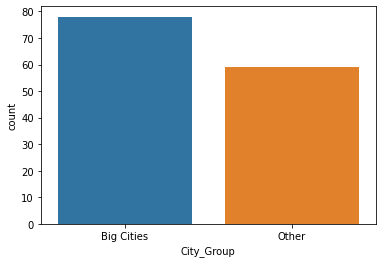

In [13]:
sns.countplot(data=df,x="City_Group")
plt.show()

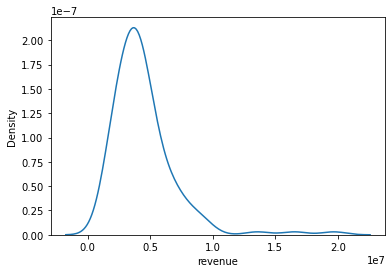

In [14]:
sns.kdeplot(data=df,x="revenue")
plt.show()

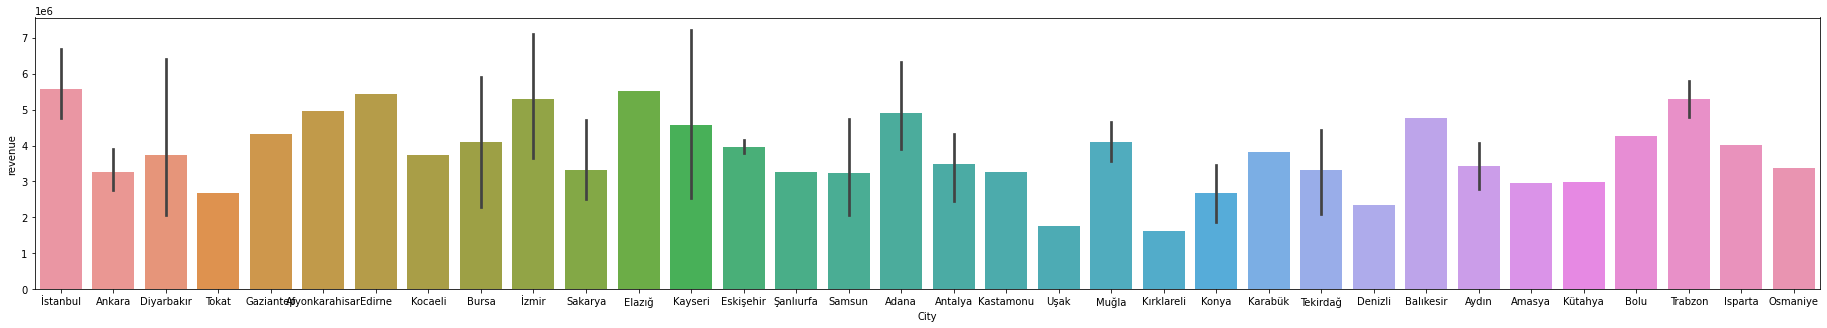

In [15]:
plt.figure(figsize=[32,5])
sns.barplot(data=df,x="City",y="revenue")
plt.show()

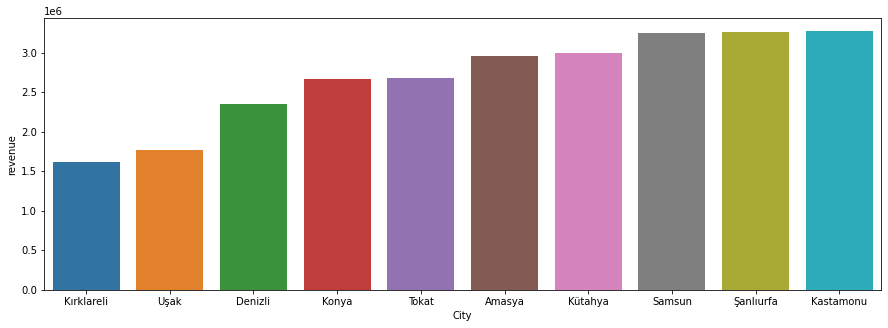

In [16]:
plt.figure(figsize=[15,5])
cityPerc = df[["City", "revenue"]].groupby(['City'],as_index=False).mean()
newDF = cityPerc.sort_values(["revenue"],ascending= True)
sns.barplot(x='City', y='revenue', data=newDF.head(10))
plt.show()

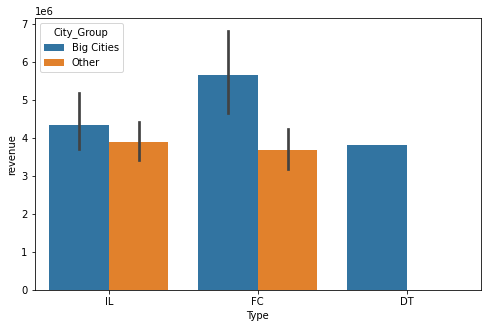

In [17]:
plt.figure(figsize=[8,5])
sns.barplot(data=df,x="Type",y="revenue",hue="City_Group")
plt.show()

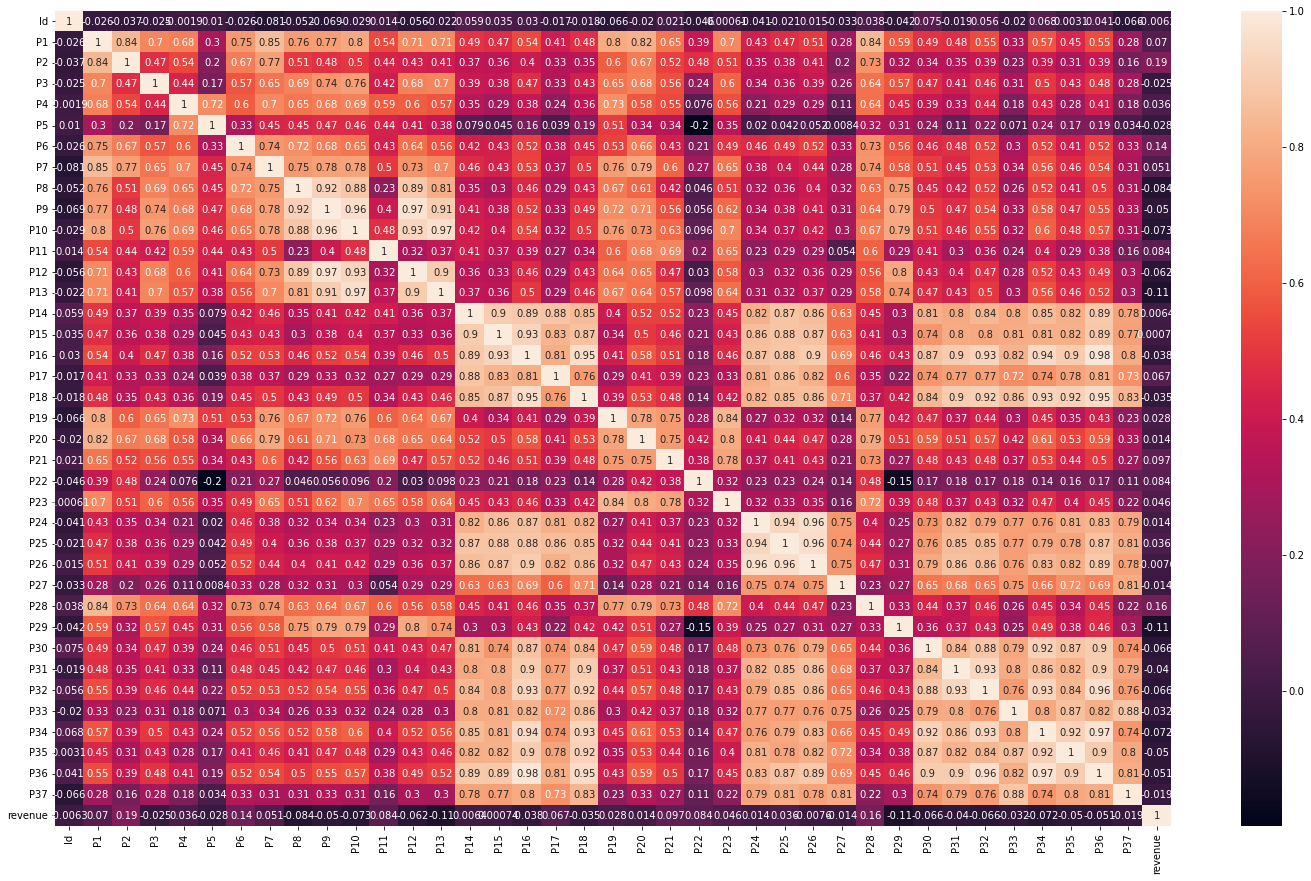

In [18]:
corr=df.corr()
plt.figure(figsize=[25,15])
sns.heatmap(data=corr,annot=True)
plt.show()

#### 2.Converting classification to Bineary

In [19]:
lable=LabelEncoder()

lable.fit(df.City_Group.drop_duplicates())
df.City_Group = lable.transform(df.City_Group)

lable.fit(df.Type.drop_duplicates())
df.Type = lable.transform(df.Type)

print(df)

      Id   Open_Date        City  City_Group  Type  P1   P2   P3   P4  P5  \
0      0  07/17/1999    İstanbul           0     2   4  5.0  4.0  4.0   2   
1      1  02/14/2008      Ankara           0     1   4  5.0  4.0  4.0   1   
2      2  03/09/2013  Diyarbakır           1     2   2  4.0  2.0  5.0   2   
3      3  02/02/2012       Tokat           1     2   6  4.5  6.0  6.0   4   
4      4  05/09/2009   Gaziantep           1     2   3  4.0  3.0  4.0   2   
..   ...         ...         ...         ...   ...  ..  ...  ...  ...  ..   
132  132  06/25/2008     Trabzon           1     1   2  3.0  3.0  5.0   4   
133  133  10/12/2006       İzmir           0     1   4  5.0  4.0  4.0   2   
134  134  07/08/2006     Kayseri           1     1   3  4.0  4.0  4.0   2   
135  135  10/29/2010    İstanbul           0     1   4  5.0  4.0  5.0   2   
136  136  09/01/2009    İstanbul           0     1   4  5.0  3.0  5.0   2   

     ...  P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0    ...

#### 3.Getting the dependent and indipendent variable

In [20]:
x=df.drop(['Id','Open_Date','City','revenue'],axis=1)
y=df.loc[:,["revenue"]]
print(x)
print(y)

     City_Group  Type  P1   P2   P3   P4  P5  P6  P7  P8  ...  P28  P29  P30  \
0             0     2   4  5.0  4.0  4.0   2   2   5   4  ...  2.0  3.0    5   
1             0     1   4  5.0  4.0  4.0   1   2   5   5  ...  3.0  3.0    0   
2             1     2   2  4.0  2.0  5.0   2   3   5   5  ...  1.0  3.0    0   
3             1     2   6  4.5  6.0  6.0   4   4  10   8  ...  2.5  7.5   25   
4             1     2   3  4.0  3.0  4.0   2   2   5   5  ...  1.0  3.0    5   
..          ...   ...  ..  ...  ...  ...  ..  ..  ..  ..  ...  ...  ...  ...   
132           1     1   2  3.0  3.0  5.0   4   2   4   4  ...  2.0  3.0    0   
133           0     1   4  5.0  4.0  4.0   2   3   5   4  ...  3.0  3.0    0   
134           1     1   3  4.0  4.0  4.0   2   3   5   5  ...  2.0  3.0    0   
135           0     1   4  5.0  4.0  5.0   2   2   5   5  ...  3.0  3.0    0   
136           0     1   4  5.0  3.0  5.0   2   2   5   4  ...  3.0  3.0    0   

     P31  P32  P33  P34  P35  P36  P37 

#### 4.StandardScaler

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()#(with_std  = True ,with_mean = True, copy = True)
x = sc.fit_transform(x)
y = sc.fit_transform(y) 

In [22]:
x=pd.DataFrame(x)
print(x)

y=pd.DataFrame(y)
print(y)

           0         1         2         3         4         5         6   \
0   -0.869718  1.117025 -0.005034  0.391716 -0.308701 -0.367578 -0.006056   
1   -0.869718 -0.844929 -0.005034  0.391716 -0.308701 -0.367578 -0.835796   
2    1.149797  1.117025 -0.694749 -0.270816 -2.253162  0.619837 -0.006056   
3    1.149797  1.117025  0.684680  0.060450  1.635760  1.607252  1.653422   
4    1.149797  1.117025 -0.349892 -0.270816 -1.280931 -0.367578 -0.006056   
..        ...       ...       ...       ...       ...       ...       ...   
132  1.149797 -0.844929 -0.694749 -0.933348 -1.280931  0.619837  1.653422   
133 -0.869718 -0.844929 -0.005034  0.391716 -0.308701 -0.367578 -0.006056   
134  1.149797 -0.844929 -0.349892 -0.270816 -0.308701 -0.367578 -0.006056   
135 -0.869718 -0.844929 -0.005034  0.391716 -0.308701  0.619837 -0.006056   
136 -0.869718 -0.844929 -0.005034  0.391716 -1.280931  0.619837 -0.006056   

           7         8         9   ...        29        30        31  \
0  

#### 5.Finding its linear regression or non linear regression

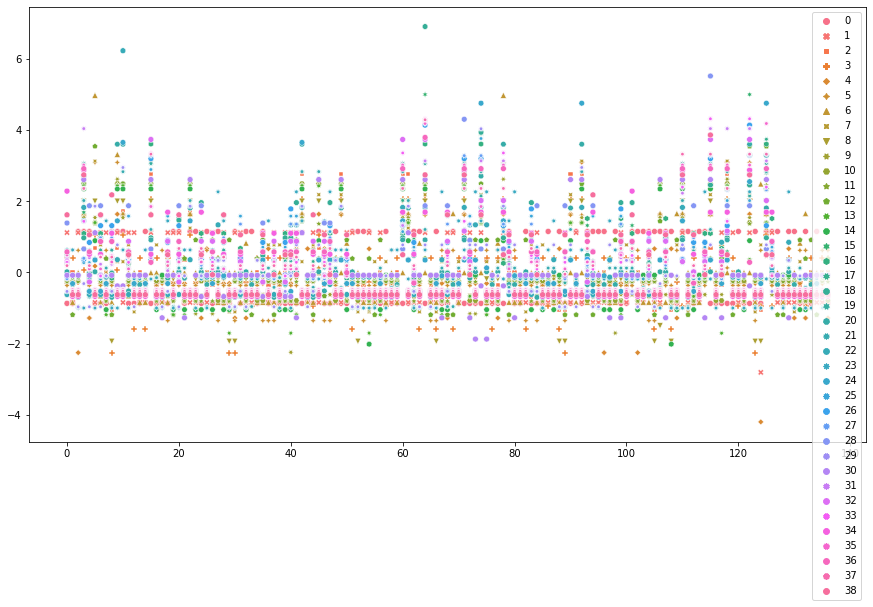

In [23]:
plt.figure(figsize=[15,8])
sns.scatterplot(data=x)
plt.show()

#### 6.PCA is used due to dimension reduction (Its a non linear regression so we use Kernal PCA)

In [24]:
from sklearn.decomposition import PCA,KernelPCA

In [25]:
kpca = KernelPCA()

In [26]:
kpca= KernelPCA(n_components=15,kernel = 'rbf')
xkpca = kpca.fit_transform(x)
xkpca=pd.DataFrame(xkpca)

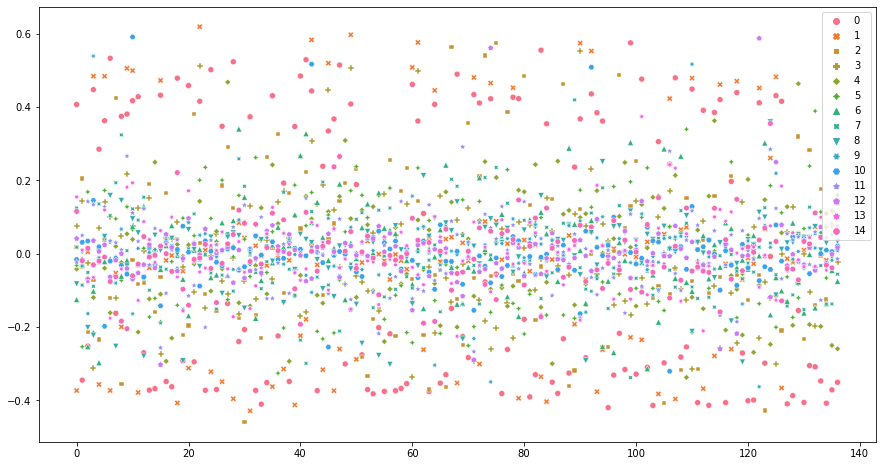

In [27]:
plt.figure(figsize=[15,8])
sns.scatterplot(data=xkpca)
plt.show()

In [28]:
print(xkpca.head())
print(y.head())

         0         1         2         3         4         5         6   \
0  0.406536 -0.373543  0.018486  0.074553 -0.042276 -0.031675 -0.125277   
1 -0.345088 -0.035258  0.204864  0.143293 -0.034364 -0.253973 -0.029173   
2 -0.252178  0.004785 -0.214444 -0.026570 -0.067502  0.168266 -0.254002   
3  0.447156  0.483756 -0.072843 -0.312281 -0.119753 -0.215395 -0.102078   
4  0.284948 -0.356895 -0.234089  0.071153  0.011494  0.013369 -0.297546   

         7         8         9         10        11        12        13  \
0  0.124381 -0.082622  0.017341 -0.016162 -0.023786  0.041063  0.154812   
1 -0.085987  0.004273 -0.033943  0.030701  0.049761 -0.015976  0.009870   
2 -0.051412 -0.201772 -0.163623  0.034217  0.142386 -0.069502 -0.076370   
3 -0.089161 -0.223236  0.538879  0.144953  0.133777  0.035292 -0.064618   
4  0.135538  0.005144 -0.011509  0.018771 -0.025277  0.005833 -0.024613   

         14  
0  0.114887  
1 -0.019466  
2  0.014589  
3 -0.030481  
4 -0.020103  
          0
0 

#### 7.Spliting training and testing daa

In [29]:
x_train,x_test,y_train,y_test=train_test_split(xkpca,y,test_size=0.2,random_state=0)

## Predection

#### 1.Using Random forest
Random forest is used on the job by data scientists in many industries including banking, stock trading, medicine, and e-commerce. It's used to predict the things which help these industries run efficiently, such as customer activity, patient history, and safety.

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
cls = RandomForestRegressor(random_state=42)

In [74]:
param_grid = { 
    'n_estimators': [50,100,120],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [200,250,300,350,400,450]
}

In [75]:
CV_rfc = GridSearchCV(estimator=cls, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [200, 250, 300, 350, 400, 450],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 120]})

In [77]:
pred = CV_rfc.predict(x_test)
pred = np.exp(pred)
pred=pd.DataFrame(pred)
print(pred)
y_test=np.array(y_test)
y_test=pd.DataFrame(y_test)
print(y_test)

           0
0   0.634821
1   1.135385
2   0.720853
3   0.788990
4   0.929185
5   2.031567
6   1.480559
7   0.617959
8   1.319240
9   1.167956
10  1.055207
11  1.069739
12  0.777633
13  0.867429
14  1.216183
15  0.814063
16  0.819383
17  1.239713
18  1.343288
19  0.826339
20  0.739522
21  1.002434
22  0.968053
23  0.851775
24  0.934651
25  0.591885
26  0.627864
27  1.973678
           0
0  -0.851735
1   0.194403
2  -0.429411
3  -0.226828
4  -0.670479
5   1.185030
6  -0.193811
7  -0.895109
8  -0.272981
9   1.733991
10 -0.332365
11 -0.918126
12  0.077273
13  0.382500
14  0.324422
15  0.167320
16 -0.116143
17 -0.065022
18  0.005531
19 -0.079083
20 -0.502039
21  0.344415
22  0.907366
23 -0.811302
24 -0.272656
25  1.070753
26  0.014834
27  5.939022


In [78]:
y_test.columns=["Actual"]
pred.columns=["Predection"]

In [79]:
ps=pd.DataFrame()
ps["pred"]=pred.Predection
ps["Actual"]=y_test.Actual
print(ps.head())

       pred    Actual
0  0.634821 -0.851735
1  1.135385  0.194403
2  0.720853 -0.429411
3  0.788990 -0.226828
4  0.929185 -0.670479


#### 2.Random forest score

In [80]:
scoreOfModel = CV_rfc.score(x_train, y_train)
print("Score is calculated as: ",scoreOfModel)

Score is calculated as:  0.8863750523711429


In [81]:
scoreOfModel1 = CV_rfc.score(x_test,y_test)
print(scoreOfModel1)

0.16299246864365702


In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 1.1734314287049095
Mean Squared Error: 1.86457109802331
Root Mean Squared Error: 1.365492987174709


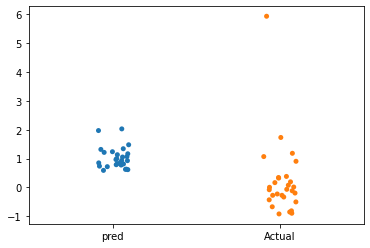

In [83]:
sns.stripplot(data=ps)
plt.show()

#### 3.Using Polynomial Regression

In [40]:
xp=xkpca
yp=y

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
x_pol=poly.fit_transform(xkpca)
xp_train,xp_test,yp_train,yp_test=train_test_split(x_pol,yp,test_size=0.2,random_state=0)
xp_train=pd.DataFrame(xp_train)
xp_test=pd.DataFrame(xp_test)

In [42]:
from sklearn.linear_model import LinearRegression
poly_reg=LinearRegression()
poly_reg.fit(xp_train,yp_train)
poly_pred=poly_reg.predict(xp_test)
print(poly_reg.coef_)

[[-1.01174624e-11  7.12768752e+00  1.27140574e+01 ...  6.67854135e-02
   1.84413524e-01  9.75414611e-01]]


In [43]:
poly_pred=pd.DataFrame(poly_pred)
poly_pred.columns=["Poly_predection"]

In [44]:
pa=pd.DataFrame()
pa["Poly_Predection"]=poly_pred.Poly_predection
pa["Actual"]=y_test.Actual
print(ps.head())

       pred    Actual
0 -0.454412 -0.851735
1  0.126972  0.194403
2 -0.327321 -0.429411
3 -0.237002 -0.226828
4 -0.073448 -0.670479


#### 4.Polynomial Regression Score

In [45]:
scoreOfModel3 = poly_reg.score(xp_train,yp_train)
print(scoreOfModel3)

1.0


In [46]:
scoreOfModel3 = poly_reg.score(xp_test,yp_test)
print(scoreOfModel3)

-1.0333453427487154


In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yp_test, poly_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yp_test, poly_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yp_test, poly_pred)))

Mean Absolute Error: 1.3343993367783018
Mean Squared Error: 3.283620734339123
Root Mean Squared Error: 1.8120763599636531


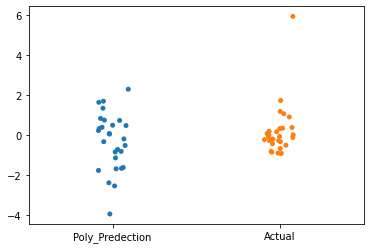

In [48]:
sns.stripplot(data=pa)
plt.show()

#### 5.Gradient Boosting Regression

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [175,200,250],
             "n_estimators": [200,500,1000],
             "subsample": [1,0.5,0.8]
             }

In [51]:
gbm_model = GradientBoostingRegressor()

In [52]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10,n_jobs=-1,verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [53]:
gbm_cv_model.best_params_

{'learning_rate': 0.001,
 'max_depth': 175,
 'n_estimators': 500,
 'subsample': 0.5}

In [54]:
gbm_tuned = GradientBoostingRegressor(**gbm_cv_model.best_params_).fit(x_train, y_train)

In [55]:
gbm_pred = gbm_tuned.predict(x_test)
print(gbm_pred)

[-0.12031092  0.04511866 -0.18315294 -0.20157221 -0.05114632  0.19340459
  0.14406164 -0.19648196  0.07572446  0.01509034  0.02188105  0.0121207
 -0.20377831 -0.13784476 -0.03037245 -0.14800738 -0.04689076 -0.02732207
  0.02374968 -0.11206296 -0.18530646 -0.01279838 -0.00587623 -0.18024655
 -0.05420589 -0.18105484 -0.2571367   0.18928477]


In [56]:
scoreOfModel4 = gbm_cv_model.score(x_train,y_train)
print(scoreOfModel4)

0.4046805652461055


In [57]:
scoreOfModel4 = gbm_cv_model.score(x_test,y_test)
print(scoreOfModel4)

0.02954601871864626


In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, gbm_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, gbm_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, gbm_pred)))

Mean Absolute Error: 0.6604162977942305
Mean Squared Error: 1.551635346471142
Root Mean Squared Error: 1.2456465576041793


####  6.XGBoost model tuning

In [59]:
from xgboost import XGBRegressor

In [60]:
xgb_params = {"learning_rate": [0.1,0.01,1],
             "max_depth": [100,120,145,150],
             "n_estimators": [100,500,1000],
             "colsample_bytree": [0.3,0.6,1]}

In [61]:
xgb = XGBRegressor()

In [62]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [63]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.01,
 'max_depth': 100,
 'n_estimators': 500}

In [64]:
xgb_tuned = XGBRegressor(**xgb_cv_model.best_params_).fit(x_train, y_train)

In [65]:
xgb_pred = xgb_tuned.predict(x_test)

In [66]:
scoreOfModel5 = xgb_tuned.score(x_train,y_train)
print(scoreOfModel5)

0.9973073854890084


In [67]:
xgb_pred=pd.DataFrame(xgb_pred)
xgb_pred.columns=["xgb_Predection"]

In [68]:
px=pd.DataFrame()
px["xgb_pred"]=xgb_pred.xgb_Predection
px["Actual"]=y_test.Actual
print(px.head())

   xgb_pred    Actual
0 -0.098649 -0.851735
1 -0.028553  0.194403
2 -0.356080 -0.429411
3 -0.234158 -0.226828
4  0.278186 -0.670479


In [69]:
scoreOfModel5 = xgb_tuned.score(x_test,y_test)
print(scoreOfModel5)

0.07102550119849016


In [70]:
xgb_pred

,xgb_Predection
0,-0.098649
1,-0.028553
2,-0.356080
3,-0.234158
4,0.278186
5,0.326496
6,0.618573
7,-0.606656
8,0.024080
9,0.170297


In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, xgb_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, xgb_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

Mean Absolute Error: 0.6838680012737065
Mean Squared Error: 1.5001878243728843
Root Mean Squared Error: 1.2248215479705133


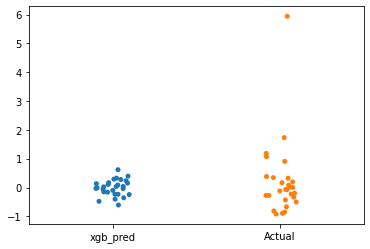

In [72]:
sns.stripplot(data=px)

## Defining the work
The data is vary less and its getting over fitting so now we implwment feature engineering

#### Reading the data and working with Feature engineering

In [106]:
trainData=pd.read_csv("train.csv")
testData=pd.read_csv("test.csv")
trainData = trainData.drop('Id', axis=1)
testData = testData.drop('Id', axis=1)

In [107]:
trainData['Open Date'] = pd.to_datetime(trainData['Open Date'], format='%m/%d/%Y')   
testData['Open Date'] = pd.to_datetime(testData['Open Date'], format='%m/%d/%Y')

trainData['OpenDays']=""
testData['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(trainData)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')  
dateLastTest = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(testData)]) })
dateLastTest['Date'] = pd.to_datetime(dateLastTest['Date'], format='%m/%d/%Y')  

trainData['OpenDays'] = dateLastTrain['Date'] - trainData['Open Date']
testData['OpenDays'] = dateLastTest['Date'] - testData['Open Date']

trainData['OpenDays'] = trainData['OpenDays'].astype('timedelta64[D]').astype(int)
testData['OpenDays'] = testData['OpenDays'].astype('timedelta64[D]').astype(int)

trainData = trainData.drop('Open Date', axis=1)
testData = testData.drop('Open Date', axis=1)

In [108]:
citygroupDummy = pd.get_dummies(trainData['City Group'])
trainData = trainData.join(citygroupDummy)

citygroupDummyTest = pd.get_dummies(testData['City Group'])
testData = testData.join(citygroupDummyTest)

trainData = trainData.drop('City Group', axis=1)
testData = testData.drop('City Group', axis=1)

In [109]:
trainData.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P32,P33,P34,P35,P36,P37,revenue,OpenDays,Big Cities,Other
0,İstanbul,IL,4,5.0,4.0,4.0,2,2,5,4,...,4,5,5,4,3,4,5653753.0,5647,1,0
1,Ankara,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,6923131.0,2513,1,0
2,Diyarbakır,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,2055379.0,663,0,1
3,Tokat,IL,6,4.5,6.0,6.0,4,4,10,8,...,10,6,18,12,12,6,2675511.0,1064,0,1
4,Gaziantep,IL,3,4.0,3.0,4.0,2,2,5,5,...,3,2,3,4,3,3,4316715.0,2063,0,1


#### 2.Createing train test data

In [110]:
xTrain = pd.DataFrame({'OpenDays':trainData['OpenDays'].apply(np.log),
                      'Big Cities':trainData['Big Cities'], 'Other':trainData['Other'],
                      'P2':trainData['P2'], 'P8':trainData['P8'], 'P22':trainData['P22'],
                      'P24':trainData['P24'], 'P28':trainData['P28'], 'P26':trainData['P26']})
yTrain = trainData['revenue'].apply(np.log)
xTest = pd.DataFrame({'OpenDays':testData['OpenDays'].apply(np.log),
                      'Big Cities':testData['Big Cities'], 'Other':testData['Other'],
                     'P2':testData['P2'], 'P8':testData['P8'], 'P22':testData['P22'],
                      'P24':testData['P24'], 'P28':testData['P28'], 'P26':testData['P26']})

In [111]:
#Regression on everything
cls = RandomForestRegressor(n_estimators=150)
cls.fit(xTrain, yTrain)
pred = cls.predict(xTest)
pred = np.exp(pred)
cls.score(xTrain, yTrain)

0.8643412994475157

#### 3.Createing predictions

In [112]:
pred = cls.predict(xTest)
pred = np.exp(pred)

In [113]:
#making our data to open again becouse we aldrady droped our id before for featyre engineering
testData=pd.read_csv("test.csv")
submission = pd.DataFrame({
        "Id": testData["Id"],
        "Prediction": pred
    })
submission.to_csv('RandomForestSimple.csv',header=True, index=False)

In [114]:
print(submission.head())

   Id    Prediction
0   0  3.735294e+06
1   1  3.169282e+06
2   2  2.227666e+06
3   3  2.880775e+06
4   4  3.518019e+06
